In [1]:
import torch
from models import RBM, prepare_mnist

In [2]:
import numpy as np
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [3]:
batch_size=128
n_hid = 1000
n_vis = 784
lr = 0.01
n_epoch = 30
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print("device:", device)

device: cuda


In [4]:
train_datasets, train_loader, test_datasets, test_loader = prepare_mnist(batch_size=batch_size)

In [5]:
model = RBM(n_vis=n_vis, n_hid=n_hid).to(device)
def generate_vv():
    for epoch in tqdm(range(n_epoch)):
        vv = np.zeros((len(train_datasets), n_hid))
        for idx, (data, target) in enumerate(train_loader):
            batch_size = data.size(0)
            n_iter = len(train_loader) * epoch + idx
            recon_loss = model.train_step(data.to(device), lr=lr).to("cpu")
            writer.add_scalars(f"RBM/hid_{n_hid}/recon_loss", {"train": recon_loss}, n_iter)
            vv[idx*batch_size:(idx+1)*batch_size, :] = model.encode(data.view(-1, n_vis).to(device)).detach().cpu().numpy()
        yield epoch, vv
        

100%|██████████| 30/30 [03:46<00:00,  7.54s/it]


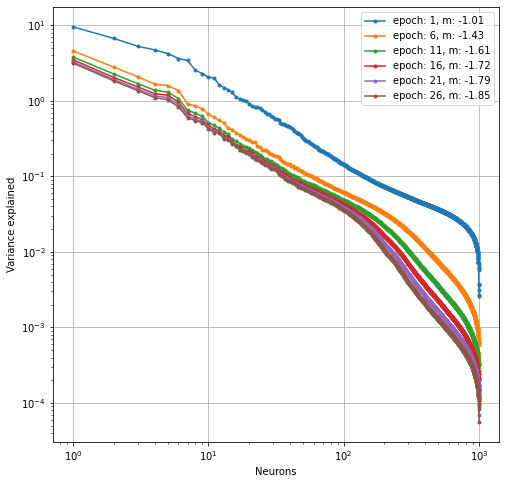

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


fig, ax = plt.subplots(figsize=(8, 8))
xx = np.arange(n_hid) + 1
log_xx = np.log(xx)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')
for i, vv in generate_vv():
    if i % 5 != 0:
        continue
    pca = PCA()
    pca.fit(vv)
    yy = pca.explained_variance_
    log_yy = np.log(yy)
    m, c = np.linalg.lstsq(np.vstack([log_xx, np.ones(len(log_xx))]).T, log_yy, rcond=None)[0]
    ax.plot(xx, yy, '.-', label=f"epoch: {i + 1}, m: {m:.3}")
plt.legend()
ax.grid()


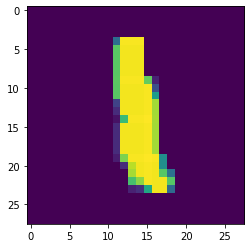

In [7]:
images = next(iter(test_loader))[0]
plt.imshow(images[0].numpy().reshape(28,28))

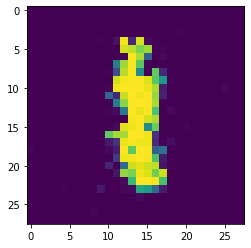

In [8]:
memorized = model.forward(images.view(128, -1).to(device))
plt.imshow(memorized[0].detach().cpu().numpy().reshape(28, 28))

In [4]:
train_datasets, train_loader, test_datasets, test_loader = prepare_mnist(batch_size=batch_size)

In [11]:
from torchvision import datasets, transforms
n_vis = 14*14

def prepare_small_mnist(batch_size=128, size=(14,14)):
    train_datasets = datasets.MNIST(
        root="./data",
        train=True,
        download=True,
        transform=transforms.Compose(
            [transforms.ToTensor(), transforms.Resize(size=size), transforms.Normalize(0, 1)]
        ),
    )
    train_loader = torch.utils.data.DataLoader(
        dataset=train_datasets,
        batch_size=batch_size,
        shuffle=True,
    )
    test_datasets = datasets.MNIST(
        root="./data",
        train=False,
        download=True,
        transform=transforms.Compose([transforms.ToTensor(), transforms.Resize(size=size)]),
    )
    test_loader = torch.utils.data.DataLoader(
        dataset=test_datasets, batch_size=batch_size, shuffle=True
    )

    return train_datasets, train_loader, test_datasets, test_loader


train_datasets, train_loader, test_datasets, test_loader = prepare_small_mnist()

In [12]:
model = RBM(n_vis=n_vis, n_hid = n_hid).to(device)
def generate_vv():
    for epoch in tqdm(range(n_epoch)):
        vv = np.zeros((len(train_datasets), n_hid))
        for idx, (data, target) in enumerate(train_loader):
            batch_size = data.size(0)
            n_iter = len(train_loader) * epoch + idx
            recon_loss = model.train_step(data.to(device), lr=lr).to("cpu")
            writer.add_scalars(f"RBM/vis_{n_vis}/hid_{n_hid}/recon_loss", {"train": recon_loss}, n_iter)
            vv[idx*batch_size:(idx+1)*batch_size, :] = model.encode(data.view(-1, n_vis).to(device)).detach().cpu().numpy()
        yield epoch, vv

100%|██████████| 30/30 [04:49<00:00,  9.66s/it]


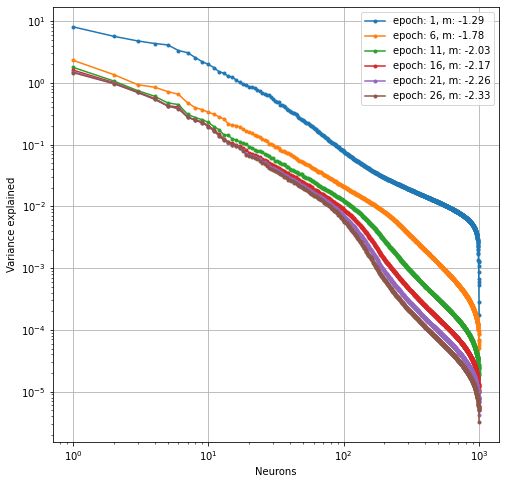

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


fig, ax = plt.subplots(figsize=(8, 8))
xx = np.arange(n_hid) + 1
log_xx = np.log(xx)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')
for i, vv in generate_vv():
    if i % 5 != 0:
        continue
    pca = PCA()
    pca.fit(vv)
    yy = pca.explained_variance_
    log_yy = np.log(yy)
    m, c = np.linalg.lstsq(np.vstack([log_xx, np.ones(len(log_xx))]).T, log_yy, rcond=None)[0]
    ax.plot(xx, yy, '.-', label=f"epoch: {i + 1}, m: {m:.3}")
plt.legend()
ax.grid()

In [14]:
from torchvision import datasets, transforms
n_vis = 7*7

def prepare_small_mnist(batch_size=128, size=(7, 7)):
    train_datasets = datasets.MNIST(
        root="./data",
        train=True,
        download=True,
        transform=transforms.Compose(
            [transforms.ToTensor(), transforms.Resize(size=size), transforms.Normalize(0, 1)]
        ),
    )
    train_loader = torch.utils.data.DataLoader(
        dataset=train_datasets,
        batch_size=batch_size,
        shuffle=True,
    )
    test_datasets = datasets.MNIST(
        root="./data",
        train=False,
        download=True,
        transform=transforms.Compose([transforms.ToTensor(), transforms.Resize(size=size)]),
    )
    test_loader = torch.utils.data.DataLoader(
        dataset=test_datasets, batch_size=batch_size, shuffle=True
    )

    return train_datasets, train_loader, test_datasets, test_loader


train_datasets, train_loader, test_datasets, test_loader = prepare_small_mnist()

In [15]:
model = RBM(n_vis=n_vis, n_hid = n_hid).to(device)
def generate_vv():
    for epoch in tqdm(range(n_epoch)):
        vv = np.zeros((len(train_datasets), n_hid))
        for idx, (data, target) in enumerate(train_loader):
            batch_size = data.size(0)
            n_iter = len(train_loader) * epoch + idx
            recon_loss = model.train_step(data.to(device), lr=lr).to("cpu")
            writer.add_scalars(f"RBM/vis_{n_vis}/hid_{n_hid}/recon_loss", {"train": recon_loss}, n_iter)
            vv[idx*batch_size:(idx+1)*batch_size, :] = model.encode(data.view(-1, n_vis).to(device)).detach().cpu().numpy()
        yield epoch, vv

100%|██████████| 30/30 [04:50<00:00,  9.68s/it]


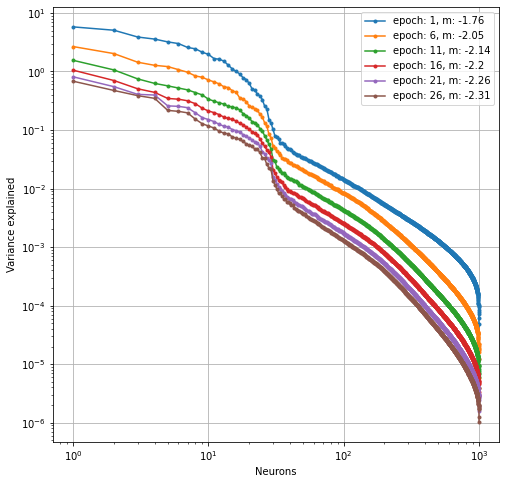

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


fig, ax = plt.subplots(figsize=(8, 8))
xx = np.arange(n_hid) + 1
log_xx = np.log(xx)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')
for i, vv in generate_vv():
    if i % 5 != 0:
        continue
    pca = PCA()
    pca.fit(vv)
    yy = pca.explained_variance_
    log_yy = np.log(yy)
    m, c = np.linalg.lstsq(np.vstack([log_xx, np.ones(len(log_xx))]).T, log_yy, rcond=None)[0]
    ax.plot(xx, yy, '.-', label=f"epoch: {i + 1}, m: {m:.3}")
plt.legend()
ax.grid()

In [ ]:
from models import AutoEncoder

model = AutoEncoder(n_vis=n_vis, n_hid=n_hid).to(device)
def generate_vv():
    for epoch in tqdm(range(n_epoch)):
        vv = np.zeros((len(train_datasets), n_hid))
        for idx, (data, target) in enumerate(train_loader):
            batch_size = data.size(0)
            n_iter = len(train_loader) * epoch + idx
            recon_loss = model.train_step(data.to(device), lr=lr)
            writer.add_scalars(f"Autoencoder/hid_{n_hid}/recon_loss", {"train": recon_loss}, n_iter)
            vv[idx*batch_size:(idx+1)*batch_size, :] = model.encode(data.view(-1, n_vis).to(device)).detach().cpu().numpy()
        yield epoch, vv